# CLUSTERIZAÇÃO VARIÁVEIS SINTÉTICAS DE NÍVEL DE DESENVOLVIMENTO DO MUNICÍPIO

CNAE_FISCAL_PRINCIPAL - MUNICÍPIO - FREQUÊNCIA_CP

In [1]:
import pandas as pd
df = pd.read_csv('df_final_cp.csv')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO
0,2023,4712100,3849
1,2023,4321500,5453
2,2023,8599604,8877
3,2023,4617600,9051
4,2023,8230001,7225
...,...,...,...
56520613,1901,8411600,3473
56520614,1899,6462000,7107
56520615,1893,8413200,4123
56520616,1891,1321900,4675


In [2]:
# Calculando a frequência e adicionando a coluna FREQUÊNCIA_CP
frequencia_cp = df.groupby(['MUNICÍPIO', 'CNAE_FISCAL_PRINCIPAL']).size().reset_index(name='FREQUÊNCIA_CP')
df = pd.merge(df, frequencia_cp, on=['MUNICÍPIO', 'CNAE_FISCAL_PRINCIPAL'], how='left')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,FREQUÊNCIA_CP
0,2023,4712100,3849,21979
1,2023,4321500,5453,683
2,2023,8599604,8877,611
3,2023,4617600,9051,385
4,2023,8230001,7225,299
...,...,...,...,...
56520613,1901,8411600,3473,4
56520614,1899,6462000,7107,31372
56520615,1893,8413200,4123,7
56520616,1891,1321900,4675,13


In [3]:
dados_cluster = df[['CNAE_FISCAL_PRINCIPAL', 'MUNICÍPIO', 'FREQUÊNCIA_CP']]
dados_cluster

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,FREQUÊNCIA_CP
0,4712100,3849,21979
1,4321500,5453,683
2,8599604,8877,611
3,4617600,9051,385
4,8230001,7225,299
...,...,...,...
56520613,8411600,3473,4
56520614,6462000,7107,31372
56520615,8413200,4123,7
56520616,1321900,4675,13


In [4]:
# Realize a amostragem aleatória simples com 0,01% dos dados
dados_cluster = dados_cluster.sample(frac=0.0001, random_state=42)
dados_cluster

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,FREQUÊNCIA_CP
40516950,6201501,6001,4053
46647478,4617600,9487,147
40083955,8291100,2381,216
43535496,4639701,4371,516
25285018,1412602,255,1128
...,...,...,...
13669561,6203100,4123,1535
39108389,4530703,2531,3743
23011088,4929901,7107,15988
44680783,7112000,7535,4627


In [5]:
# transformações necessárias para aplicação do algoritmo
# Converter as colunas "MUNICÍPIO" e "CNAE_FISCAL_PRINCIPAL" em string
dados_cluster["MUNICÍPIO"] = dados_cluster["MUNICÍPIO"].astype(str)
dados_cluster["CNAE_FISCAL_PRINCIPAL"] = dados_cluster["CNAE_FISCAL_PRINCIPAL"].astype(str)

# Agrupar o DataFrame pelos campos desejados
grupo = dados_cluster.groupby(["FREQUÊNCIA_CP", "MUNICÍPIO", "CNAE_FISCAL_PRINCIPAL"]).size().reset_index(name="Contagem")

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_cluster_scaled = scaler.fit_transform(grupo)

pca = PCA(n_components=2)  # k é o número de componentes principais desejados
X = pca.fit_transform(dados_cluster_scaled)

componentes_principais = pca.components_
variancia_explicada = pca.explained_variance_ratio_


Número de clusters encontrados: 6


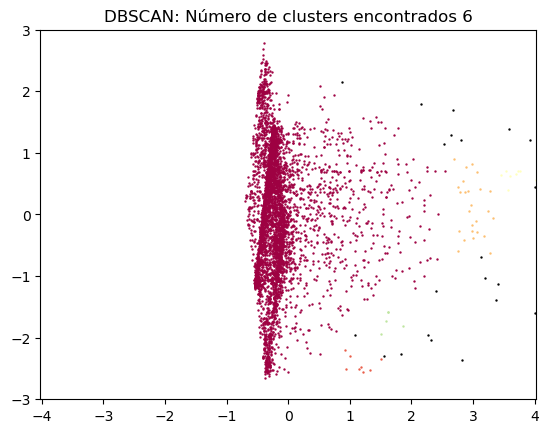

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Aplicando o DBSCAN
eps = 0.3  # Parâmetro de distância máxima entre os pontos do mesmo cluster
min_samples = 5  # Número mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Obtendo a quantidade de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Criando um gráfico colorido dos clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruído é exibido em preto
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=0.5)

plt.title('DBSCAN: Número de clusters encontrados {}'.format(n_clusters))

# Centralizar o gráfico na origem
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()
